# Step 1: Import all Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


# Step 2: Load Dataset and get all insights

In [76]:
print("Loading dataset...")

# Load data from both sheets
fuchka_data = pd.read_excel('Newmerrow method pi value dataset.xlsx', sheet_name='Fuchka')
tamarind_data = pd.read_excel('Newmerrow method pi value dataset.xlsx', sheet_name='Tamarind')

Loading dataset...


In [77]:
# Clean column names
fuchka_data.columns = fuchka_data.columns.str.strip()
tamarind_data.columns = tamarind_data.columns.str.strip()

In [78]:
# Get common metals
fuchka_metals = set(fuchka_data.columns) - {'Locations'}
tamarind_metals = set(tamarind_data.columns) - {'Locations'}
metals_common = sorted(list(fuchka_metals.intersection(tamarind_metals)))

print(f"Fuchka data shape: {fuchka_data.shape}")
print(f"Tamarind data shape: {tamarind_data.shape}")
print(f"Common metals: {metals_common}")
print(f"Total common metals: {len(metals_common)}")

# Display first few rows
print("\nFuchka data (first 3 rows):")
print(fuchka_data.head(3))
print("\nTamarind data (first 3 rows):")
print(tamarind_data.head(3))

Fuchka data shape: (42, 10)
Tamarind data shape: (42, 14)
Common metals: ['Cd', 'Co', 'Cr', 'Cu', 'Fe', 'Hg', 'Ni', 'Pb', 'Zn']
Total common metals: 9

Fuchka data (first 3 rows):
   Locations      Pb      Cd       Cr        Hg     Co       Ni        Fe  \
0          1  8.9531  0.4804  0.14116  0.000550  5.386  0.46226  0.044587   
1          2  0.4316  0.0100  0.01000  0.004710  1.000  0.01000  0.040302   
2          3  5.9507  0.2958  0.10152  0.004344  4.718  0.31798  0.148689   

         Cu        Zn  
0  0.280096  0.044183  
1  0.253388  0.054284  
2  0.277344  0.052644  

Tamarind data (first 3 rows):
   Locations     Pb      Cd        Cr      Hg        Co        Ni         Al  \
0          1  0.125  0.6825  0.377325  0.0625  0.004168  0.313643  14.246331   
1          2  0.125  4.4460  0.754125  0.0625  0.001250  0.017857  11.221787   
2          3  0.125  0.6240  1.371525  0.0625  0.005595  0.285750  28.238837   

          Fe        Cu        Zn        Mn         Sb       As 

### Declare risk thresholds and color codes for each of them

In [79]:
# Risk classification thresholds (based on document)
risk_thresholds = {
    'Clean': (0, 1),
    'Slight Pollution': (1, 2), 
    'Moderate Pollution': (2, 3),
    'Strong Pollution': (3, float('inf'))
}

# Color scheme for risk levels (based on document)
risk_colors = {
    'Clean': '#00FF00',      # Green
    'Slight Pollution': '#FFFF00',           # Yellow  
    'Moderate Pollution': "#FFA600D3", # Orange
    'Strong Pollution': "#FF0000CC",     # Red
}

In [80]:
def classify_risk(pi_value):
    """Classify risk level based on Pi value"""
    for risk_level, (min_val, max_val) in risk_thresholds.items():
        if min_val <= pi_value < max_val:
            return risk_level
    return 'Strong Pollution'

print("Risk classification criteria defined:")
for risk, threshold in risk_thresholds.items():
    print(f"  {risk}: {threshold[0]} - {threshold[1] if threshold[1] != float('inf') else '∞'}")


Risk classification criteria defined:
  Clean: 0 - 1
  Slight Pollution: 1 - 2
  Moderate Pollution: 2 - 3
  Strong Pollution: 3 - ∞


# Step 3: Get Visualization  Risk factors for all Metals in both Fuchka and Tamarind

In [81]:
# Get all metals for each food type (not just common ones)
fuchka_metals = [col for col in fuchka_data.columns if col != 'Locations']
tamarind_metals = [col for col in tamarind_data.columns if col != 'Locations']

print(f"Fuchka metals: {fuchka_metals}")
print(f"Tamarind metals: {tamarind_metals}")
print(f"Number of Fuchka metals: {len(fuchka_metals)}")
print(f"Number of Tamarind metals: {len(tamarind_metals)}")
print(f"Risk classification: {list(risk_thresholds.keys())}")

Fuchka metals: ['Pb', 'Cd', 'Cr', 'Hg', 'Co', 'Ni', 'Fe', 'Cu', 'Zn']
Tamarind metals: ['Pb', 'Cd', 'Cr', 'Hg', 'Co', 'Ni', 'Al', 'Fe', 'Cu', 'Zn', 'Mn', 'Sb', 'As']
Number of Fuchka metals: 9
Number of Tamarind metals: 13
Risk classification: ['Clean', 'Slight Pollution', 'Moderate Pollution', 'Strong Pollution']


### For Fuchka


Creating Fuchka metal charts with risk-based color coding...


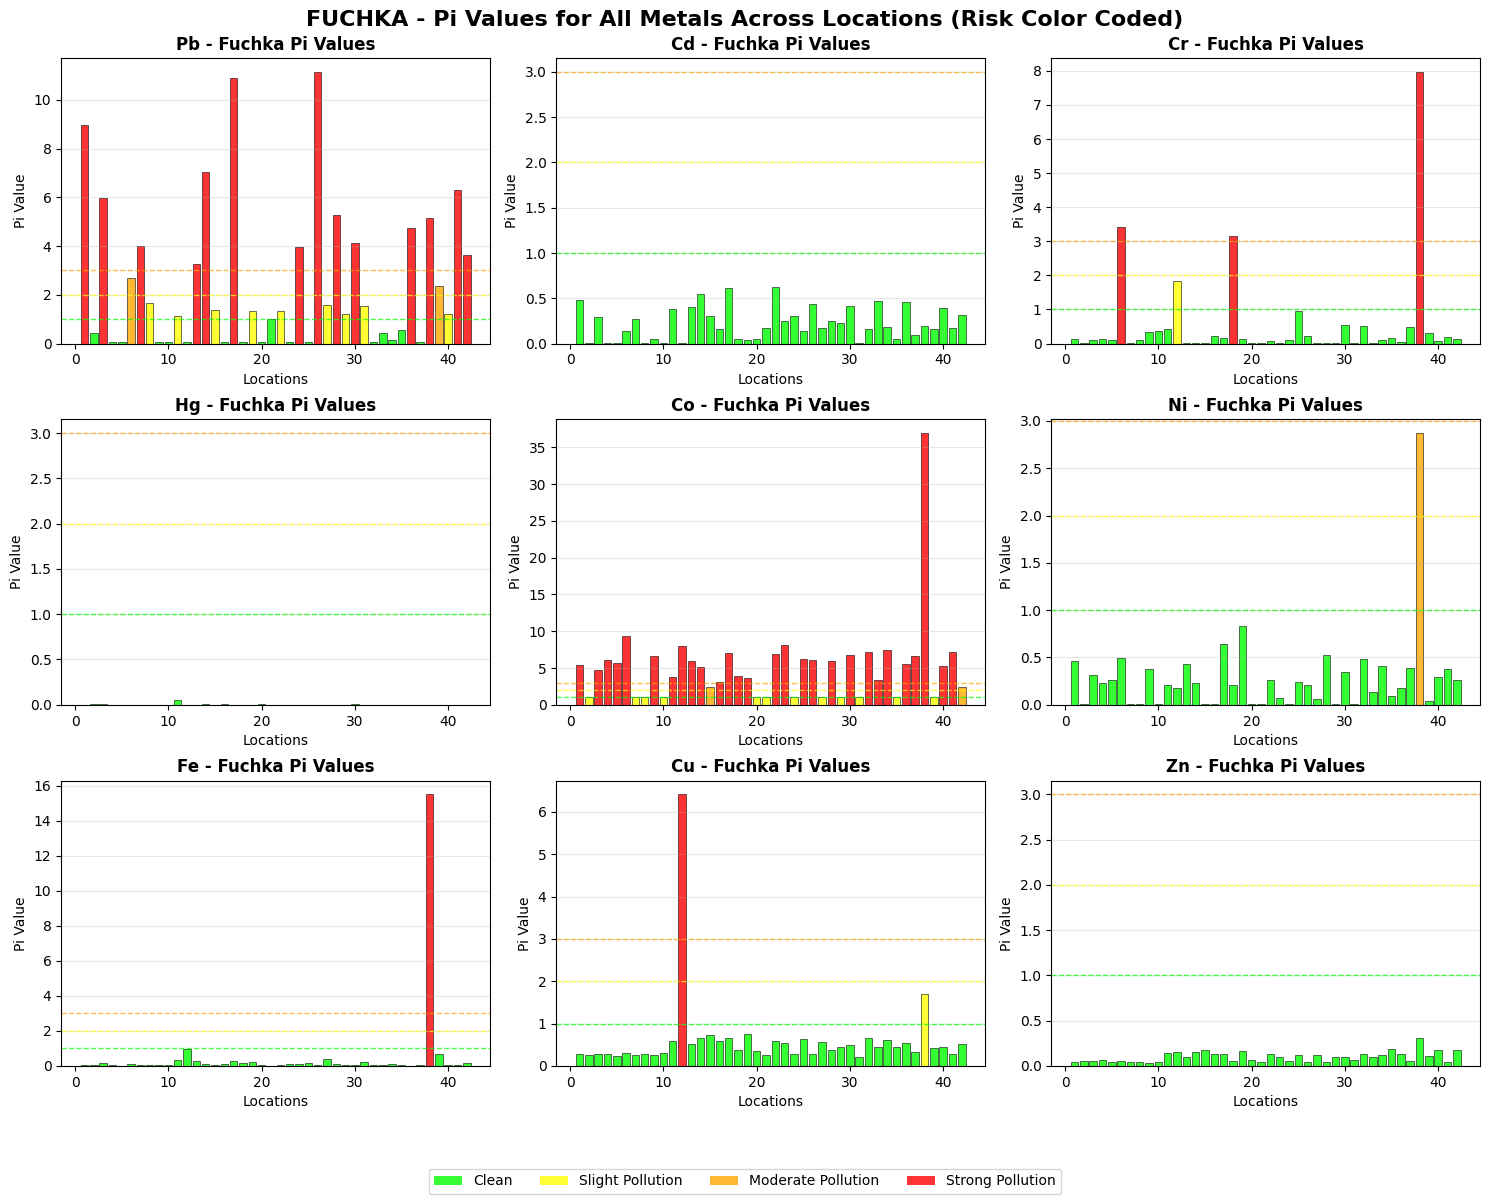

In [82]:
# FUCHKA CHARTS
print("\nCreating Fuchka metal charts with risk-based color coding...")

n_fuchka_metals = len(fuchka_metals)
cols = 3
rows_fuchka = (n_fuchka_metals + cols - 1) // cols

fig_fuchka, axes_fuchka = plt.subplots(rows_fuchka, cols, figsize=(15, 4*rows_fuchka))
fig_fuchka.suptitle('FUCHKA - Pi Values for All Metals Across Locations (Risk Color Coded)', fontsize=16, fontweight='bold')

# Handle axes formatting
if rows_fuchka == 1:
    axes_fuchka = [axes_fuchka] if cols == 1 else axes_fuchka
else:
    axes_fuchka = axes_fuchka.flatten()

for i, metal in enumerate(fuchka_metals):
    ax = axes_fuchka[i]
    
    # Get data for this metal
    fuchka_values = fuchka_data[metal].values
    locations = fuchka_data['Locations'].values
    
    # Color each bar based on its risk level
    bar_colors = [risk_colors[classify_risk(value)] for value in fuchka_values]
    
    # Create bar chart with risk-based colors
    bars = ax.bar(locations, fuchka_values, alpha=0.8, color=bar_colors, edgecolor='black', linewidth=0.5)
    
    ax.set_title(f'{metal} - Fuchka Pi Values', fontweight='bold', fontsize=12)
    ax.set_xlabel('Locations')
    ax.set_ylabel('Pi Value')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add risk threshold lines
    for risk_level, (min_val, max_val) in risk_thresholds.items():
        if max_val != float('inf'):
            ax.axhline(y=max_val, color=risk_colors[risk_level], linestyle='--', alpha=0.7, linewidth=1)
    
    # # Add value labels on top of bars (optional, for better readability)
    # for bar, value in zip(bars, fuchka_values):
    #     if value > 0.1:  # Only show labels for significant values
    #         ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(fuchka_values)*0.01,
    #                f'{value:.2f}', ha='center', va='bottom', fontsize=8, rotation=45)

# Hide extra subplots for Fuchka
for i in range(n_fuchka_metals, len(axes_fuchka)):
    axes_fuchka[i].set_visible(False)

# Add legend for risk levels
from matplotlib.patches import Rectangle
legend_elements = [Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=risk) 
                  for risk, color in risk_colors.items()]
fig_fuchka.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
          ncol=len(risk_colors), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

### For Tamarind


Creating Tamarind metal charts with risk-based color coding...


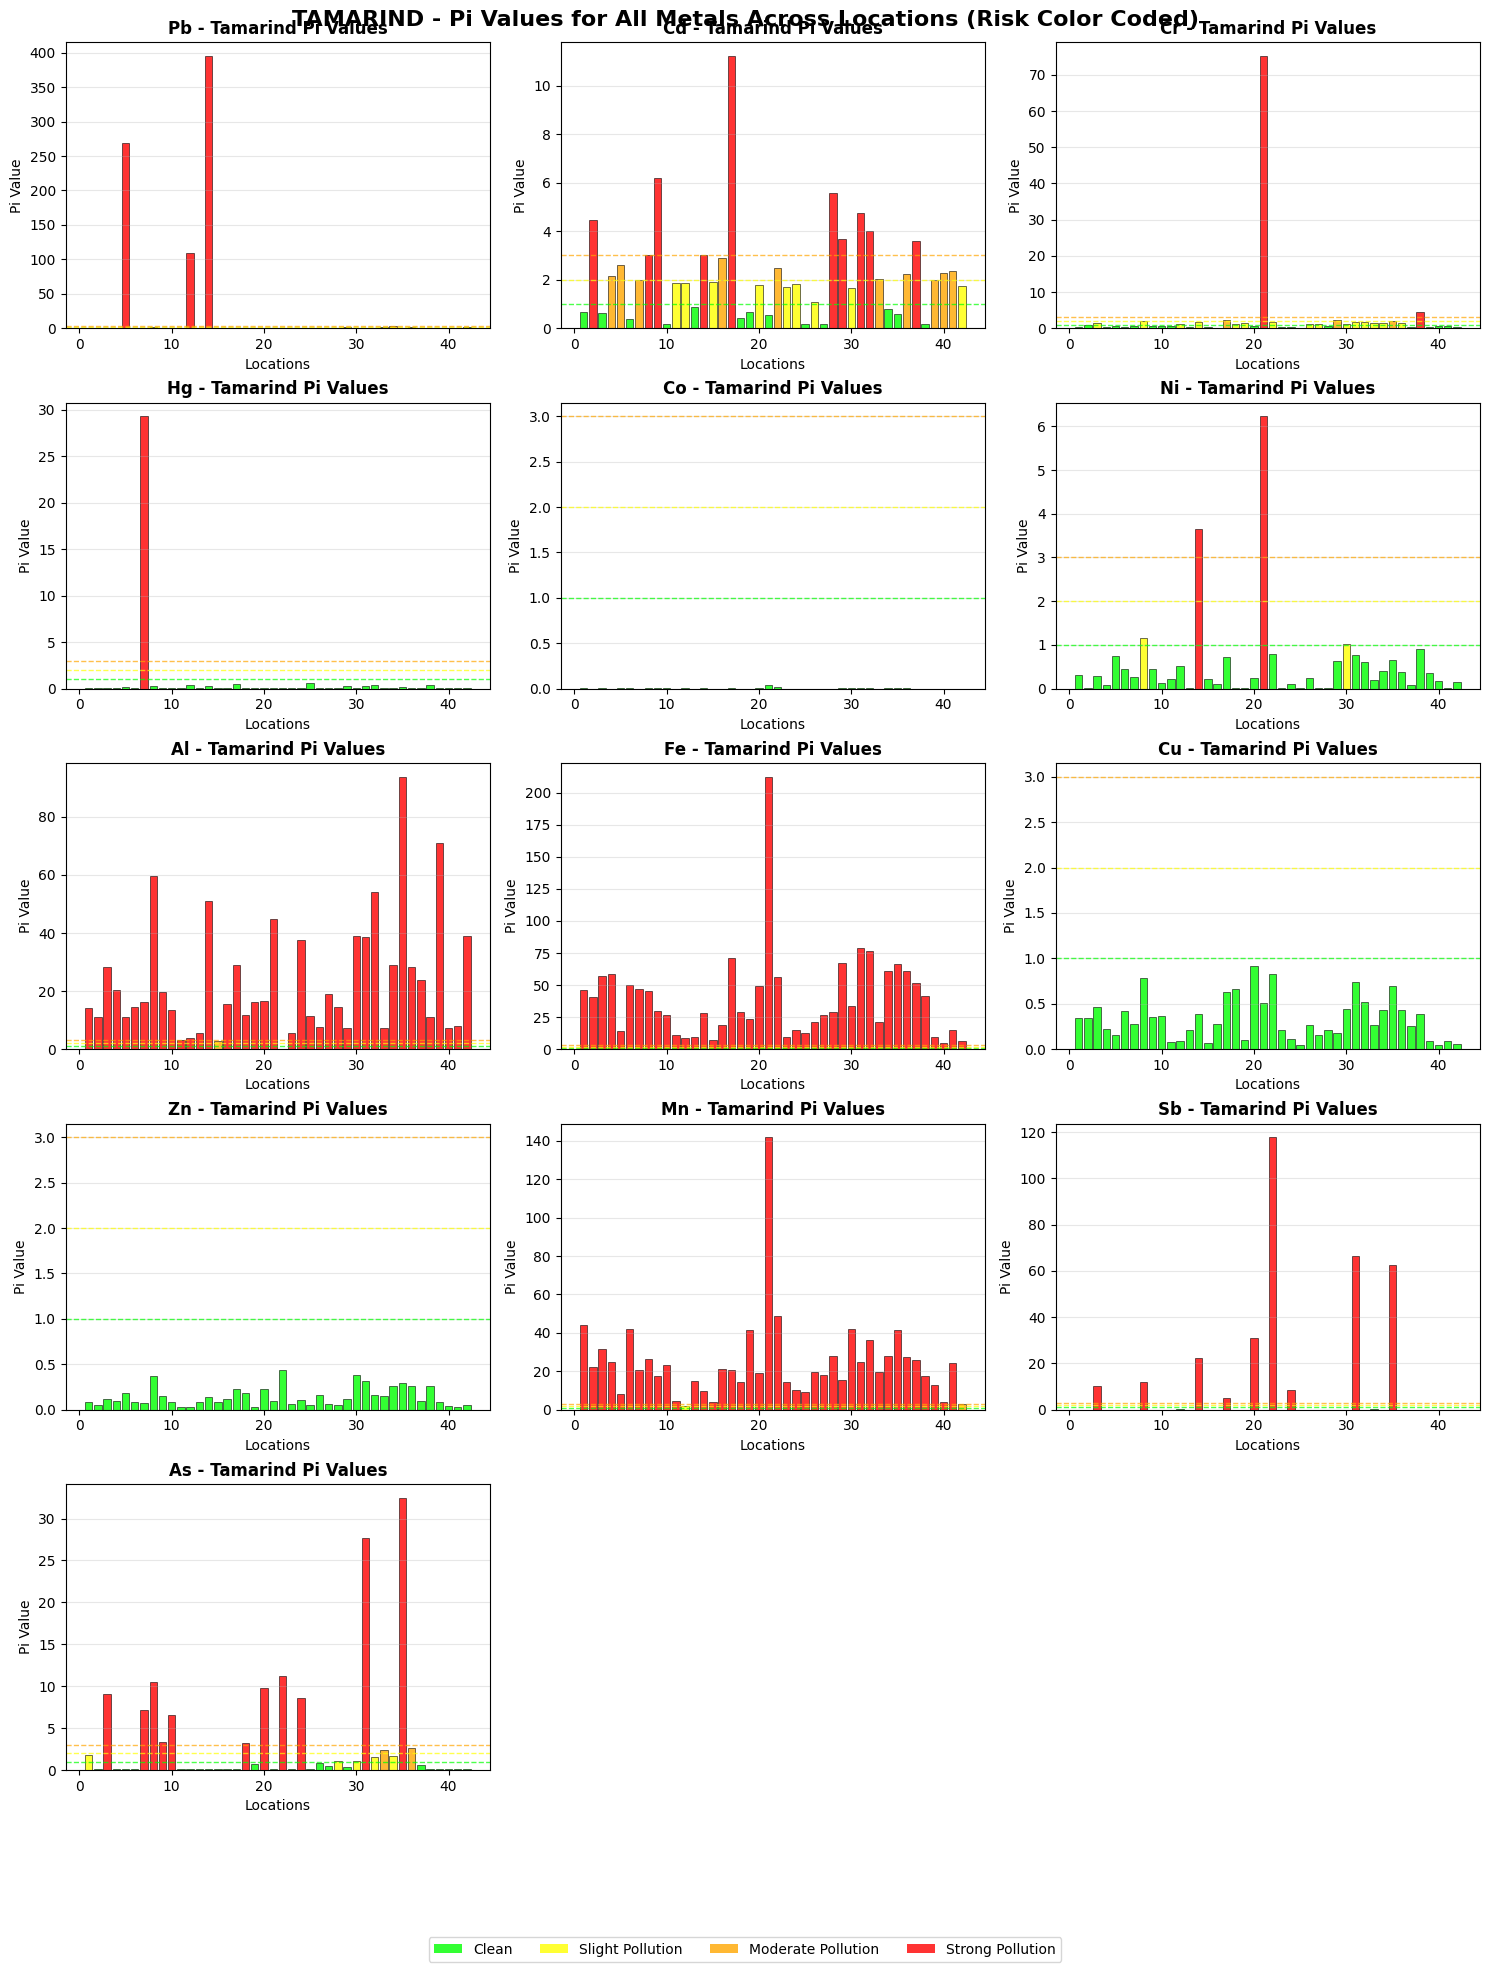

In [83]:
# TAMARIND CHARTS
print("\nCreating Tamarind metal charts with risk-based color coding...")

n_tamarind_metals = len(tamarind_metals)
rows_tamarind = (n_tamarind_metals + cols-1) // cols

fig_tamarind, axes_tamarind = plt.subplots(rows_tamarind, cols, figsize=(15, 4*rows_tamarind))
fig_tamarind.suptitle('TAMARIND - Pi Values for All Metals Across Locations (Risk Color Coded)', fontsize=16, fontweight='bold')

# Handle axes formatting
if rows_tamarind == 1:
    axes_tamarind = [axes_tamarind] if cols == 1 else axes_tamarind
else:
    axes_tamarind = axes_tamarind.flatten()

for i, metal in enumerate(tamarind_metals):
    ax = axes_tamarind[i]
    
    # Get data for this metal
    tamarind_values = tamarind_data[metal].values
    locations = tamarind_data['Locations'].values
    
    # Color each bar based on its risk level
    bar_colors = [risk_colors[classify_risk(value)] for value in tamarind_values]
    
    # Create bar chart with risk-based colors
    bars = ax.bar(locations, tamarind_values, alpha=0.8, color=bar_colors, edgecolor='black', linewidth=0.5)
    
    ax.set_title(f'{metal} - Tamarind Pi Values', fontweight='bold', fontsize=12)
    ax.set_xlabel('Locations')
    ax.set_ylabel('Pi Value')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add risk threshold lines
    for risk_level, (min_val, max_val) in risk_thresholds.items():
        if max_val != float('inf'):
            ax.axhline(y=max_val, color=risk_colors[risk_level], linestyle='--', alpha=0.7, linewidth=1)
    
    # # Add value labels on top of bars (optional, for better readability)
    # for bar, value in zip(bars, tamarind_values):
    #     if value > 0.1:  # Only show labels for significant values
    #         ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(tamarind_values)*0.01,
    #                f'{value:.2f}', ha='center', va='bottom', fontsize=8, rotation=45)

# Hide extra subplots for Tamarind
for i in range(n_tamarind_metals, len(axes_tamarind)):
    axes_tamarind[i].set_visible(False)

# Add legend for risk levels
legend_elements = [Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=risk) 
                  for risk, color in risk_colors.items()]
fig_tamarind.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
          ncol=len(risk_colors), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

# ALTERNATIVE: Single chart showing all metals for each food type (with risk color coding)


Creating consolidated charts (All metals per food type with risk colors)...


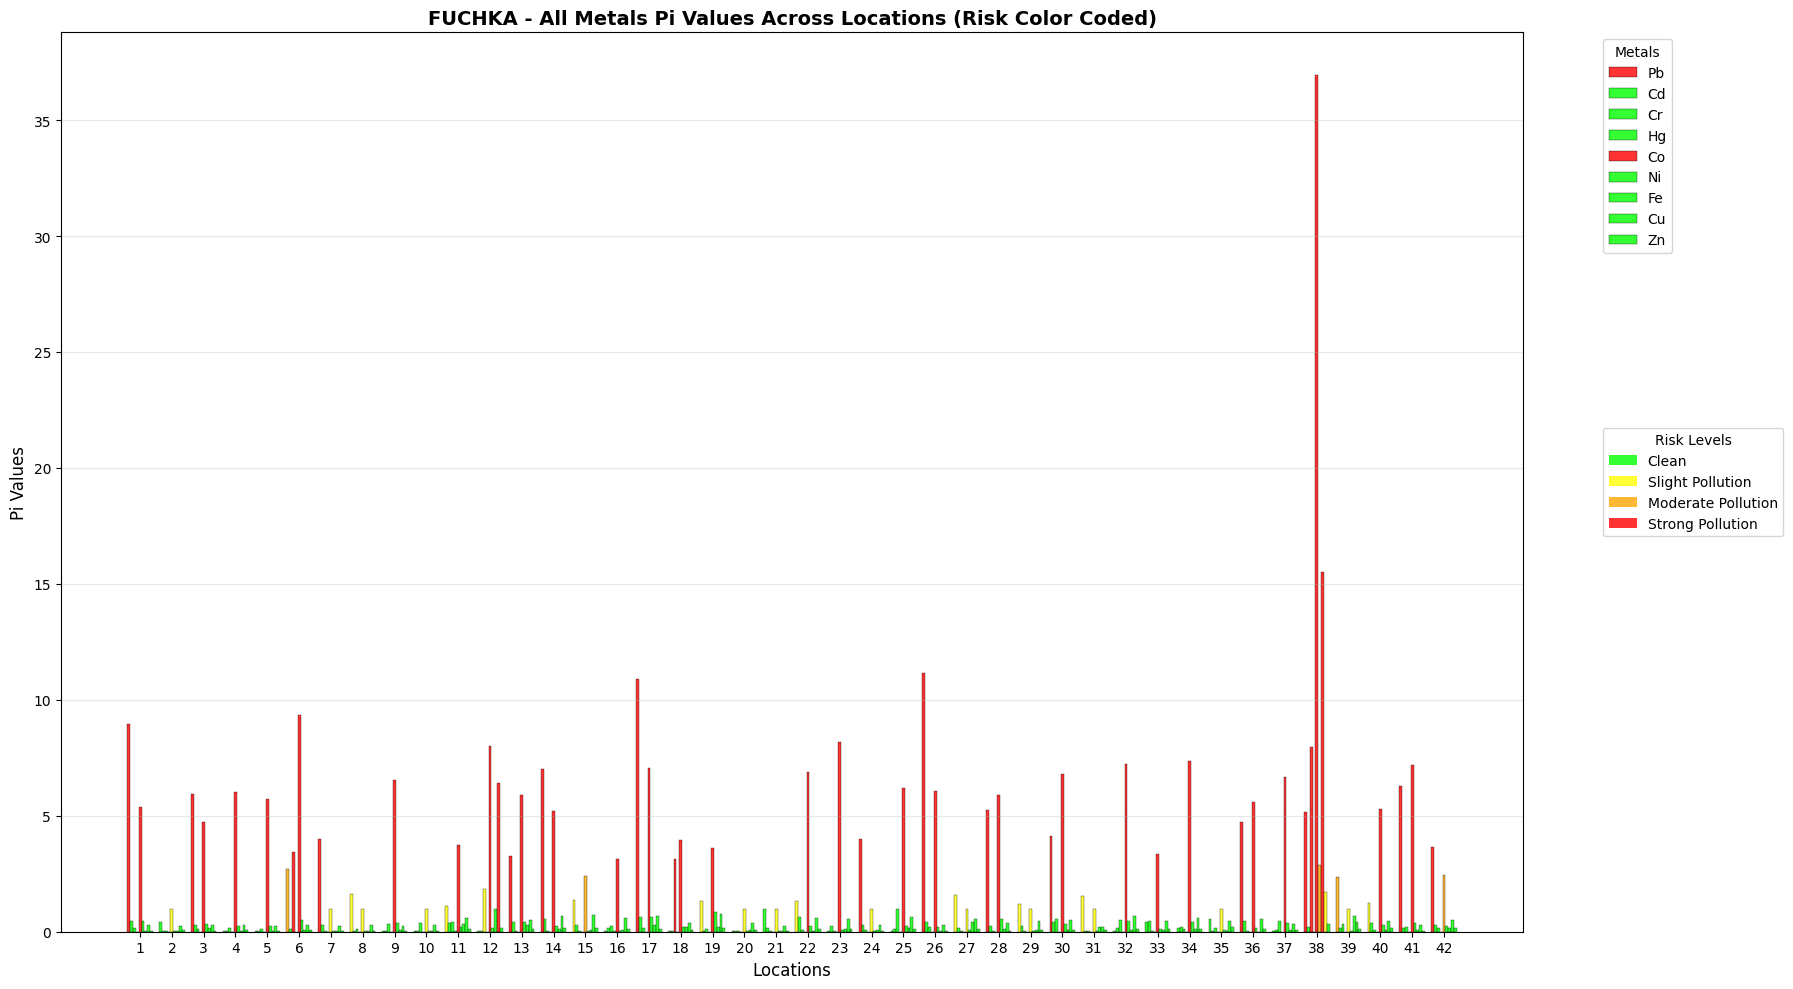

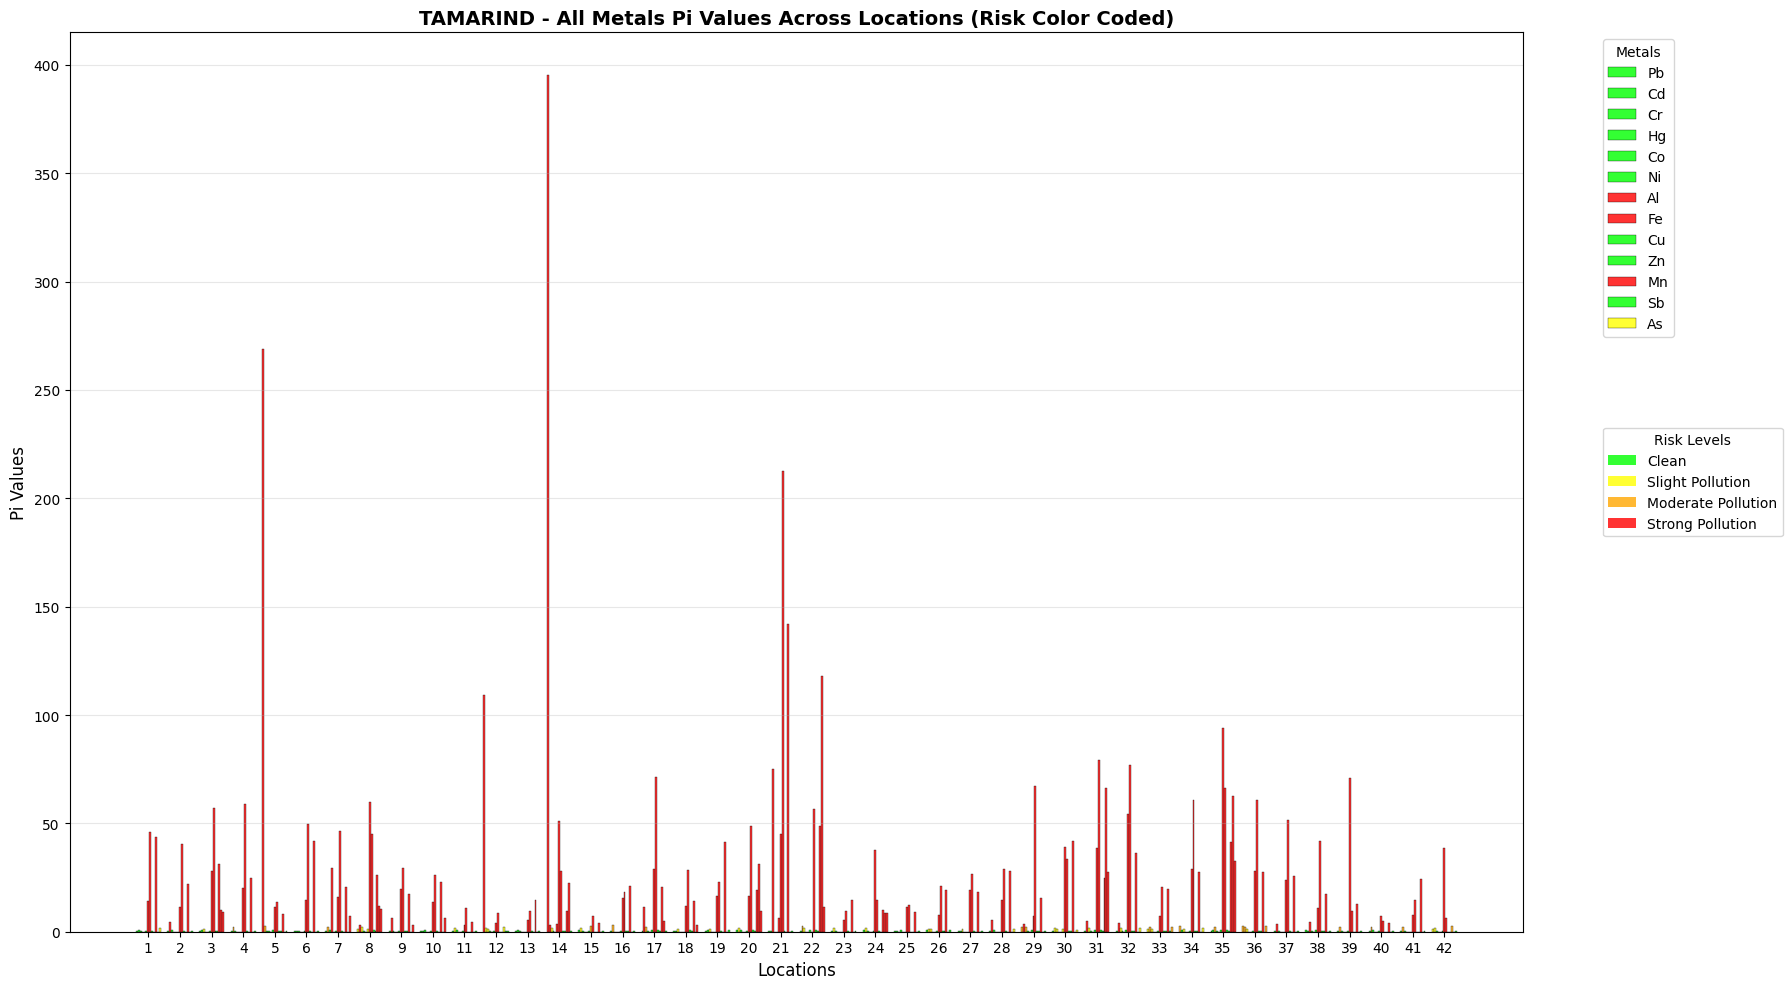

All metal charts created successfully with risk-based color coding!
Created 9 individual charts for Fuchka metals
Created 13 individual charts for Tamarind metals
Plus 2 consolidated charts showing all metals per food type
Risk levels: ['Clean', 'Slight Pollution', 'Moderate Pollution', 'Strong Pollution']
Each bar is colored according to its risk classification level


In [84]:
print("\nCreating consolidated charts (All metals per food type with risk colors)...")

# Fuchka - All metals in one chart
plt.figure(figsize=(18, 10))
locations = fuchka_data['Locations'].values
n_locations = len(locations)
n_metals_f = len(fuchka_metals)

# Calculate bar width and positions
bar_width = 0.8 / n_metals_f
x_positions = np.arange(n_locations)

for i, metal in enumerate(fuchka_metals):
    values = fuchka_data[metal].values
    offset = (i - n_metals_f/2) * bar_width + bar_width/2
    
    # Color each bar based on its risk level
    bar_colors = [risk_colors[classify_risk(value)] for value in values]
    
    plt.bar(x_positions + offset, values, bar_width, label=metal, alpha=0.8, color=bar_colors, edgecolor='black', linewidth=0.3)

plt.xlabel('Locations', fontsize=12)
plt.ylabel('Pi Values', fontsize=12)
plt.title('FUCHKA - All Metals Pi Values Across Locations (Risk Color Coded)', fontweight='bold', fontsize=14)
plt.xticks(x_positions, locations)

# Create combined legend for metals and risk levels
metal_legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metals')
plt.gca().add_artist(metal_legend)

# Add risk level legend
risk_legend_elements = [Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=risk) 
                       for risk, color in risk_colors.items()]
risk_legend = plt.legend(handles=risk_legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left', title='Risk Levels')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Tamarind - All metals in one chart
plt.figure(figsize=(18, 10))
locations = tamarind_data['Locations'].values
n_locations = len(locations)
n_metals_t = len(tamarind_metals)

# Calculate bar width and positions
bar_width = 0.8 / n_metals_t
x_positions = np.arange(n_locations)

for i, metal in enumerate(tamarind_metals):
    values = tamarind_data[metal].values
    offset = (i - n_metals_t/2) * bar_width + bar_width/2
    
    # Color each bar based on its risk level
    bar_colors = [risk_colors[classify_risk(value)] for value in values]
    
    plt.bar(x_positions + offset, values, bar_width, label=metal, alpha=0.8, color=bar_colors, edgecolor='black', linewidth=0.3)

plt.xlabel('Locations', fontsize=12)
plt.ylabel('Pi Values', fontsize=12)
plt.title('TAMARIND - All Metals Pi Values Across Locations (Risk Color Coded)', fontweight='bold', fontsize=14)
plt.xticks(x_positions, locations)

# Create combined legend for metals and risk levels
metal_legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Metals')
plt.gca().add_artist(metal_legend)

# Add risk level legend
risk_legend_elements = [Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=risk) 
                       for risk, color in risk_colors.items()]
risk_legend = plt.legend(handles=risk_legend_elements, bbox_to_anchor=(1.05, 0.5), loc='center left', title='Risk Levels')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("All metal charts created successfully with risk-based color coding!")
print(f"Created {n_fuchka_metals} individual charts for Fuchka metals")
print(f"Created {n_tamarind_metals} individual charts for Tamarind metals")
print("Plus 2 consolidated charts showing all metals per food type")
print(f"Risk levels: {list(risk_thresholds.keys())}")
print("Each bar is colored according to its risk classification level")

# Step 4: Computing Newmerow Ps Values

### For Fuchka

In [85]:
print("Computing Newmerow Ps values for Fuchka...")

fuchka_ps_results = []

for idx, row in fuchka_data.iterrows():
    location = row['Locations']
    
    # Get pi values for common metals only
    pi_values = []
    for metal in metals_common:
        pi_values.append(row[metal])
    
    pi_values = np.array(pi_values)
    
    # Calculate P(avg) and P(max)
    p_avg = np.mean(pi_values)
    p_max = np.max(pi_values)
    
    # Newmerow formula: Ps = sqrt((P(avg)² + P(max)²) / 2)
    ps = np.sqrt((p_avg**2 + p_max**2) / 2)
    
    fuchka_ps_results.append({
        'Location': location,
        'P_avg': p_avg,
        'P_max': p_max,
        'Ps': ps,
        'Risk_Level': classify_risk(ps)
    })

fuchka_ps_df = pd.DataFrame(fuchka_ps_results)
print("Fuchka Ps computation completed!")
print(f"Average Ps for Fuchka: {fuchka_ps_df['Ps'].mean():.3f}")
print(f"Max Ps for Fuchka: {fuchka_ps_df['Ps'].max():.3f}")
print("\nFirst 5 results:")
print(fuchka_ps_df.head())

Computing Newmerow Ps values for Fuchka...
Fuchka Ps computation completed!
Average Ps for Fuchka: 4.133
Max Ps for Fuchka: 26.702

First 5 results:
   Location     P_avg   P_max        Ps        Risk_Level
0       1.0  1.754704  8.9531  6.451240  Strong Pollution
1       2.0  0.201587  1.0000  0.721331             Clean
2       3.0  1.318558  5.9507  4.309839  Strong Pollution
3       4.0  0.759179  6.0340  4.300320  Strong Pollution
4       5.0  0.717842  5.7060  4.066555  Strong Pollution


### For Tamarind

In [86]:
print("Computing Newmerow Ps values for Tamarind...")

tamarind_ps_results = []

for idx, row in tamarind_data.iterrows():
    location = row['Locations']
    
    # Get pi values for common metals only
    pi_values = []
    for metal in metals_common:
        pi_values.append(row[metal])
    
    pi_values = np.array(pi_values)
    
    # Calculate P(avg) and P(max)
    p_avg = np.mean(pi_values)
    p_max = np.max(pi_values)
    
    # Newmerow formula: Ps = sqrt((P(avg)² + P(max)²) / 2)
    ps = np.sqrt((p_avg**2 + p_max**2) / 2)
    
    tamarind_ps_results.append({
        'Location': location,
        'P_avg': p_avg,
        'P_max': p_max,
        'Ps': ps,
        'Risk_Level': classify_risk(ps)
    })

tamarind_ps_df = pd.DataFrame(tamarind_ps_results)
print("Tamarind Ps computation completed!")
print(f"Average Ps for Tamarind: {tamarind_ps_df['Ps'].mean():.3f}")
print(f"Max Ps for Tamarind: {tamarind_ps_df['Ps'].max():.3f}")
print("\nFirst 5 results:")
print(tamarind_ps_df.head())

Computing Newmerow Ps values for Tamarind...
Tamarind Ps computation completed!
Average Ps for Tamarind: 40.181
Max Ps for Tamarind: 281.550

First 5 results:
   Location      P_avg       P_max          Ps        Risk_Level
0       1.0   5.342890   46.096487   32.813356  Strong Pollution
1       2.0   5.123081   40.311900   28.734085  Strong Pollution
2       3.0   6.699805   57.245913   40.755257  Strong Pollution
3       4.0   6.860356   58.720987   41.804419  Strong Pollution
4       5.0  31.908309  268.989750  191.538019  Strong Pollution


# Step 5: Computing co-consumed Ps values using RMS

In [87]:
print("Computing co-consumed Ps values using RMS...")

# Merge the two dataframes on Location
fuchka_ps_simple = fuchka_ps_df[['Location', 'Ps']].rename(columns={'Ps': 'Ps_Fuchka'})
tamarind_ps_simple = tamarind_ps_df[['Location', 'Ps']].rename(columns={'Ps': 'Ps_Tamarind'})

co_consumed_df = pd.merge(fuchka_ps_simple, tamarind_ps_simple, on='Location')

# Calculate RMS: Ps_co_consumed = sqrt[(Ps_Fuchka² + Ps_Tamarind²) / 2]
co_consumed_df['Ps_co_consumed'] = np.sqrt(
    (co_consumed_df['Ps_Fuchka']**2 + co_consumed_df['Ps_Tamarind']**2) / 2
)

# Classify risk for co-consumed
co_consumed_df['Risk_Level'] = co_consumed_df['Ps_co_consumed'].apply(classify_risk)

print("Co-consumed Ps computation completed!")
print(f"Average co-consumed Ps: {co_consumed_df['Ps_co_consumed'].mean():.3f}")
print(f"Max co-consumed Ps: {co_consumed_df['Ps_co_consumed'].max():.3f}")
print("\nFirst 5 results:")
print(co_consumed_df.head())

Computing co-consumed Ps values using RMS...
Co-consumed Ps computation completed!
Average co-consumed Ps: 28.884
Max co-consumed Ps: 199.119

First 5 results:
   Location  Ps_Fuchka  Ps_Tamarind  Ps_co_consumed        Risk_Level
0       1.0   6.451240    32.813356       23.646721  Strong Pollution
1       2.0   0.721331    28.734085       20.324467  Strong Pollution
2       3.0   4.309839    40.755257       28.979007  Strong Pollution
3       4.0   4.300320    41.804419       29.716176  Strong Pollution
4       5.0   4.066555   191.538019      135.468354  Strong Pollution


Creating Ps visualizations with risk color coding...


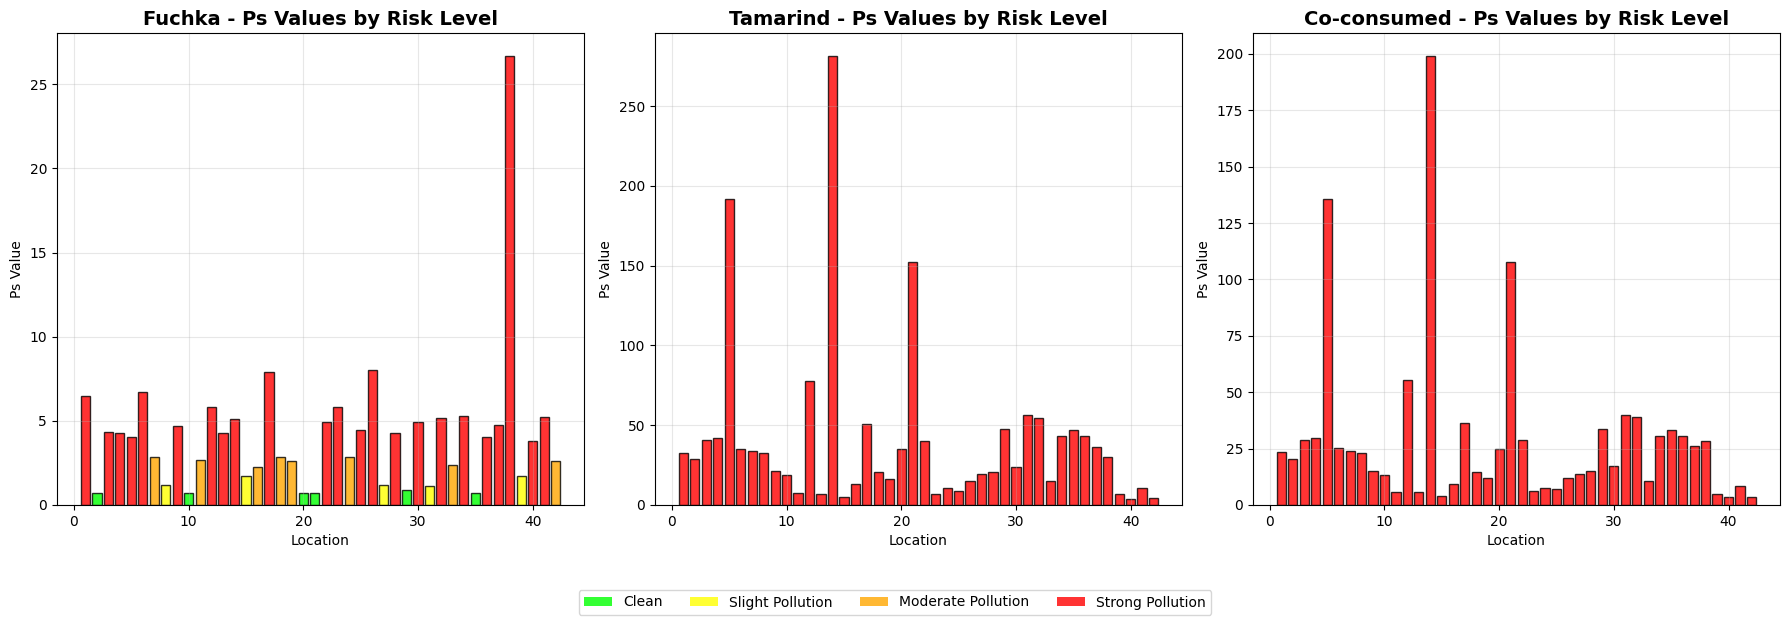

In [88]:
print("Creating Ps visualizations with risk color coding...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Fuchka Ps
colors_fuchka = [risk_colors[risk] for risk in fuchka_ps_df['Risk_Level']]
axes[0].bar(fuchka_ps_df['Location'], fuchka_ps_df['Ps'], color=colors_fuchka, alpha=0.8, edgecolor='black')
axes[0].set_title('Fuchka - Ps Values by Risk Level', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Ps Value')
axes[0].grid(True, alpha=0.3)

# Plot 2: Tamarind Ps  
colors_tamarind = [risk_colors[risk] for risk in tamarind_ps_df['Risk_Level']]
axes[1].bar(tamarind_ps_df['Location'], tamarind_ps_df['Ps'], color=colors_tamarind, alpha=0.8, edgecolor='black')
axes[1].set_title('Tamarind - Ps Values by Risk Level', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Ps Value')
axes[1].grid(True, alpha=0.3)

# Plot 3: Co-consumed Ps
colors_co = [risk_colors[risk] for risk in co_consumed_df['Risk_Level']]
axes[2].bar(co_consumed_df['Location'], co_consumed_df['Ps_co_consumed'], color=colors_co, alpha=0.8, edgecolor='black')
axes[2].set_title('Co-consumed - Ps Values by Risk Level', fontweight='bold', fontsize=14)
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Ps Value')
axes[2].grid(True, alpha=0.3)

# Add legend
legend_elements = [Rectangle((0,0),1,1, facecolor=color, alpha=0.8, label=risk) 
                  for risk, color in risk_colors.items()]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
          ncol=len(risk_colors), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

Creating comparison chart...


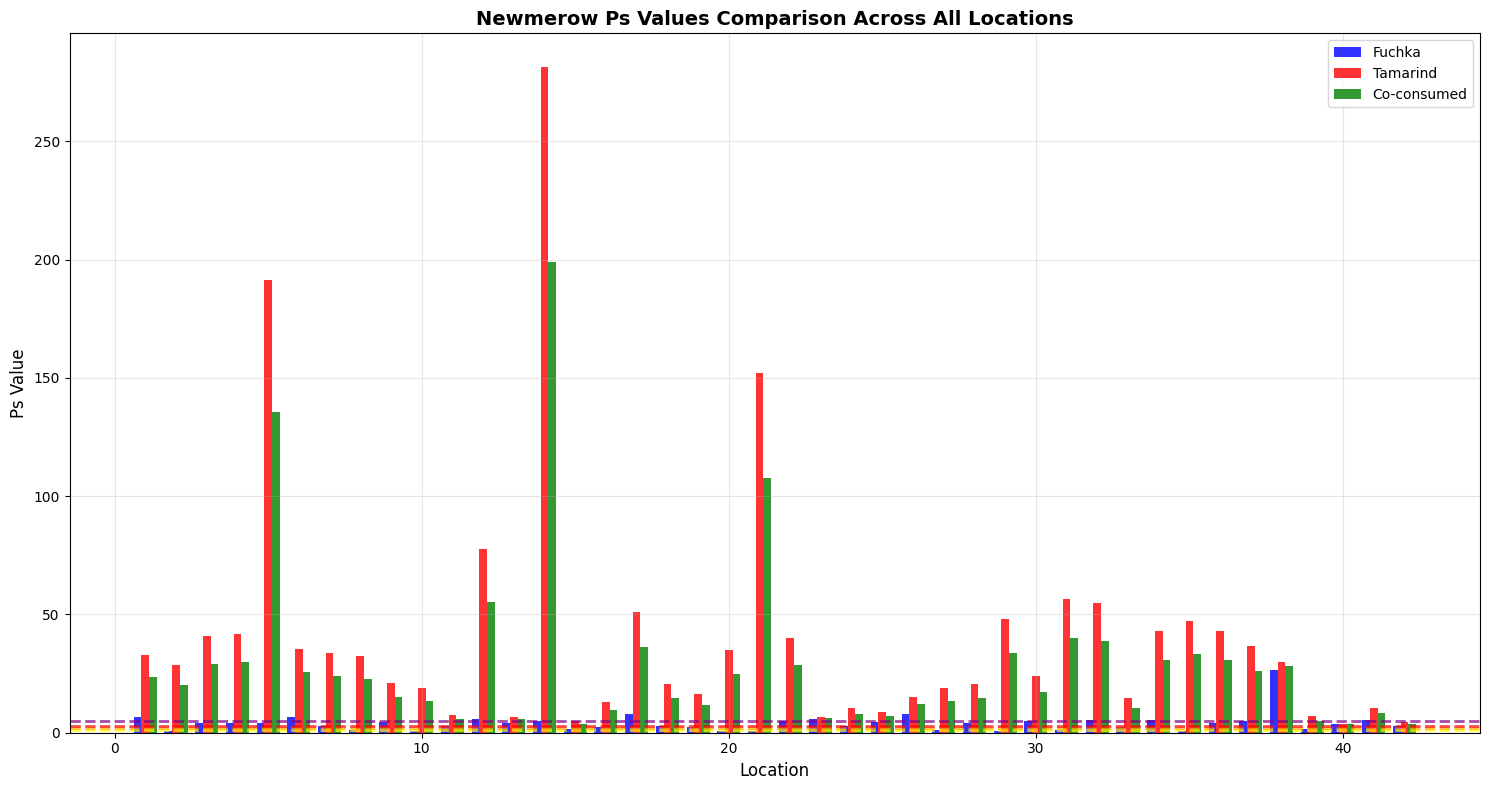

In [89]:
print("Creating comparison chart...")

plt.figure(figsize=(15, 8))

x = co_consumed_df['Location']
width = 0.25

plt.bar(x - width, co_consumed_df['Ps_Fuchka'], width, label='Fuchka', alpha=0.8, color='blue')
plt.bar(x, co_consumed_df['Ps_Tamarind'], width, label='Tamarind', alpha=0.8, color='red')
plt.bar(x + width, co_consumed_df['Ps_co_consumed'], width, label='Co-consumed', alpha=0.8, color='green')

plt.xlabel('Location', fontsize=12)
plt.ylabel('Ps Value', fontsize=12)
plt.title('Newmerow Ps Values Comparison Across All Locations', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Add risk level thresholds as horizontal lines
threshold_values = [1, 2, 3, 5]
threshold_labels = ['Warning', 'Moderate Pollution', 'High Pollution', 'Very High Pollution']
threshold_colors = ['#FFFF00', '#FFA500', '#FF0000', '#800080']

for i, (val, label, color) in enumerate(zip(threshold_values, threshold_labels, threshold_colors)):
    plt.axhline(y=val, color=color, linestyle='--', alpha=0.7, linewidth=2, label=f'{label} threshold')

plt.tight_layout()
plt.show()

In [90]:
print("Generating comprehensive summary...")

# Round values for better presentation
final_results = co_consumed_df.round(3)

print("\n" + "="*80)
print("NEWMEROW COMPOSITE INDEX ANALYSIS - FINAL RESULTS")
print("="*80)

print(f"\nDataset Information:")
print(f"  Total Locations Analyzed: {len(final_results)}")
print(f"  Metals Analyzed: {', '.join(metals_common)}")
print(f"  Total Common Metals: {len(metals_common)}")

print(f"\nStatistical Summary:")
print(f"  Fuchka Ps - Mean: {co_consumed_df['Ps_Fuchka'].mean():.3f}, Std: {co_consumed_df['Ps_Fuchka'].std():.3f}")
print(f"  Tamarind Ps - Mean: {co_consumed_df['Ps_Tamarind'].mean():.3f}, Std: {co_consumed_df['Ps_Tamarind'].std():.3f}")
print(f"  Co-consumed Ps - Mean: {co_consumed_df['Ps_co_consumed'].mean():.3f}, Std: {co_consumed_df['Ps_co_consumed'].std():.3f}")


Generating comprehensive summary...

NEWMEROW COMPOSITE INDEX ANALYSIS - FINAL RESULTS

Dataset Information:
  Total Locations Analyzed: 42
  Metals Analyzed: Cd, Co, Cr, Cu, Fe, Hg, Ni, Pb, Zn
  Total Common Metals: 9

Statistical Summary:
  Fuchka Ps - Mean: 4.133, Std: 4.095
  Tamarind Ps - Mean: 40.181, Std: 52.297
  Co-consumed Ps - Mean: 28.884, Std: 36.836


In [91]:
# Risk level distribution
print(f"\nRisk Level Distribution:")

for dataset_name, ps_column in [('Fuchka', 'Ps_Fuchka'), ('Tamarind', 'Ps_Tamarind'), ('Co-consumed', 'Ps_co_consumed')]:
    if dataset_name == 'Fuchka':
        risk_counts = fuchka_ps_df['Risk_Level'].value_counts()
    elif dataset_name == 'Tamarind':
        risk_counts = tamarind_ps_df['Risk_Level'].value_counts()
    else:
        risk_counts = co_consumed_df['Risk_Level'].value_counts()
    
    print(f"\n{dataset_name}:")
    total_locations = len(final_results)
    for risk_level in risk_thresholds.keys():
        count = risk_counts.get(risk_level, 0)
        percentage = (count / total_locations) * 100
        print(f"  {risk_level}: {count} locations ({percentage:.1f}%)")

print(f"\n" + "="*80)
print("DETAILED RESULTS TABLE")
print("="*80)
print(final_results.to_string(index=False))


Risk Level Distribution:

Fuchka:
  Clean: 6 locations (14.3%)
  Slight Pollution: 5 locations (11.9%)
  Moderate Pollution: 8 locations (19.0%)
  Strong Pollution: 23 locations (54.8%)

Tamarind:
  Clean: 0 locations (0.0%)
  Slight Pollution: 0 locations (0.0%)
  Moderate Pollution: 0 locations (0.0%)
  Strong Pollution: 42 locations (100.0%)

Co-consumed:
  Clean: 0 locations (0.0%)
  Slight Pollution: 0 locations (0.0%)
  Moderate Pollution: 0 locations (0.0%)
  Strong Pollution: 42 locations (100.0%)

DETAILED RESULTS TABLE
 Location  Ps_Fuchka  Ps_Tamarind  Ps_co_consumed       Risk_Level
      1.0      6.451       32.813          23.647 Strong Pollution
      2.0      0.721       28.734          20.324 Strong Pollution
      3.0      4.310       40.755          28.979 Strong Pollution
      4.0      4.300       41.804          29.716 Strong Pollution
      5.0      4.067      191.538         135.468 Strong Pollution
      6.0      6.733       35.369          25.459 Strong Pollu

In [92]:
print("\nSaving results to Excel file...")

# Create Excel file with multiple sheets
with pd.ExcelWriter('newmerow_analysis_results.xlsx', engine='openpyxl') as writer:
    # Save individual results
    fuchka_ps_df.round(3).to_excel(writer, sheet_name='Fuchka_Ps_Results', index=False)
    tamarind_ps_df.round(3).to_excel(writer, sheet_name='Tamarind_Ps_Results', index=False)
    final_results.to_excel(writer, sheet_name='Final_Combined_Results', index=False)
    
    # Save original data for reference
    fuchka_data.to_excel(writer, sheet_name='Original_Fuchka_Data', index=False)
    tamarind_data.to_excel(writer, sheet_name='Original_Tamarind_Data', index=False)

print("Results saved to 'newmerow_analysis_results.xlsx'")
print("\nAnalysis completed successfully!")
print("="*80)


Saving results to Excel file...
Results saved to 'newmerow_analysis_results.xlsx'

Analysis completed successfully!
